In [73]:
# Constants
DATA_PATH = '../Data/Processed/0_DataCleaned_df.csv'
DATA_PATH_PKL = '../Data/Processed/0_DataCleaned_df.pkl'
LOG_PATH = "../Models/"
LOG_MODEL_PKL   =  "model.pkl"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,avg_salary,job_title,seniority,desc_len,tools,techs,education,company_name,job_state,age
0,Data Engineer,Employer Provided Salary:$175K - $200K,At Expa we're dedicated to being the best plac...,3.7,Expa\n3.7,"Los Angeles, CA",1 to 50 Employees,2013,Company - Private,Business Consulting,...,187.5,data engineer,na,3144,3,2,2,Expa,California-CA,10
1,Data Scientist/Data Engineer - Economic Research,Employer Provided Salary:$121K - $151K,Why Glassdoor?\nOur mission is to help people ...,4.3,Glassdoor\n4.3,"Chicago, IL",501 to 1000 Employees,2007,Company - Private,Internet & Web Services,...,136.0,data scientist,na,8120,3,6,0,Glassdoor,Illinois-IL,16
2,Data Scientist,Employer Provided Salary:$60K - $140K,"We are looking for junior, mid-level or senior...",-1.0,Tech brothers infoservices,Remote,-1,-1,Company - Public,-1,...,100.0,data scientist,na,1338,4,2,0,Tech brothers infoservices,Remote,-1
3,Data Scientist,Employer Provided Salary:$79K - $117K,No Relocation Assistance Offered\n# 154742 - P...,4.2,Colgate-Palmolive\n4.2,"Piscataway, NJ",10000+ Employees,1806,Company - Public,Consumer Product Manufacturing,...,98.0,data scientist,na,5372,7,7,1,Colgate-Palmolive,New Jersey-NJ,217
4,Sr. Business Data Analyst,Employer Provided Salary:$60.00 - $70.00 Per Hour,Business Analysis Skills\nGood Data analysis S...,4.6,CTI Consulting\n4.6,"Deerfield Beach, FL",1 to 50 Employees,-1,Company - Private,-1,...,117.0,data analyst,senior,828,3,0,0,CTI Consulting,Florida-FL,-1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_title', 'seniority',
       'desc_len', 'tools', 'techs', 'education', 'company_name', 'job_state',
       'age'],
      dtype='object')

In [5]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','job_title',
               'job_state','age','tools','techs','education','seniority','desc_len','company_name','hourly','employer_provided']]
df_model

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,job_title,job_state,age,tools,techs,education,seniority,desc_len,company_name,hourly,employer_provided
0,187.5,3.7,1 to 50 Employees,Company - Private,Business Consulting,Management & Consulting,-1,data engineer,California-CA,10,3,2,2,na,3144,Expa,0,1
1,136.0,4.3,501 to 1000 Employees,Company - Private,Internet & Web Services,Information Technology,-1,data scientist,Illinois-IL,16,3,6,0,na,8120,Glassdoor,0,1
2,100.0,-1.0,-1,Company - Public,-1,-1,-1,data scientist,Remote,-1,4,2,0,na,1338,Tech brothers infoservices,0,1
3,98.0,4.2,10000+ Employees,Company - Public,Consumer Product Manufacturing,Manufacturing,$10+ billion (USD),data scientist,New Jersey-NJ,217,7,7,1,na,5372,Colgate-Palmolive,0,1
4,117.0,4.6,1 to 50 Employees,Company - Private,-1,-1,$1 to $5 million (USD),data analyst,Florida-FL,-1,3,0,0,senior,828,CTI Consulting,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,121.0,3.9,1001 to 5000 Employees,Nonprofit Organization,Research & Development,Management & Consulting,$5 to $10 billion (USD),data scientist,Ohio-OH,94,5,5,2,na,6439,Battelle,0,0
1213,167.0,3.9,1001 to 5000 Employees,Company - Public,Information Technology Support Services,Information Technology,$1 to $5 billion (USD),machine learning engineer,California-CA,12,3,5,1,na,3769,"Zoom Video Communications, Inc.",0,1
1214,159.0,3.9,10000+ Employees,Company - Public,Film Production,Media & Communication,$10+ billion (USD),machine learning engineer,California-CA,100,2,3,2,senior,2988,Disney,0,1
1215,221.5,3.2,10000+ Employees,Company - Public,Other Retail Stores,Retail & Wholesale,$1 to $5 billion (USD),data scientist,Remote,12,2,4,0,na,7039,Stitch Fix,0,1


## 1.Select a Performance Measure

### Even though RMSE is the preferred performance measure for regression tasks
### since we are going to treat all errors equally, we have a small training dataset and we may have many outliers
### then we will go with MAE

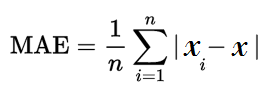

In [6]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_salary         1217 non-null   float64
 1   Rating             1217 non-null   float64
 2   Size               1217 non-null   object 
 3   Type of ownership  1217 non-null   object 
 4   Industry           1217 non-null   object 
 5   Sector             1217 non-null   object 
 6   Revenue            1217 non-null   object 
 7   job_title          1217 non-null   object 
 8   job_state          1217 non-null   object 
 9   age                1217 non-null   int64  
 10  tools              1217 non-null   int64  
 11  techs              1217 non-null   int64  
 12  education          1217 non-null   int64  
 13  seniority          1217 non-null   object 
 14  desc_len           1217 non-null   int64  
 15  company_name       1217 non-null   object 
 16  hourly             1217 

In [7]:
df_model.describe()

,avg_salary,Rating,age,tools,techs,education,desc_len,hourly,employer_provided
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,118.848809,3.232703,29.178307,2.654067,2.760887,0.590797,3013.184881,0.166804,0.649137
std,44.431452,1.815979,44.575301,1.741842,1.820800,0.781265,2224.944589,0.372954,0.477436
min,6.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,64.000000,0.000000,0.000000
25%,88.000000,3.400000,-1.000000,1.000000,1.000000,0.000000,1025.000000,0.000000,0.000000
50%,110.000000,3.900000,14.000000,2.000000,2.000000,0.000000,2646.000000,0.000000,1.000000
75%,141.500000,4.200000,34.000000,4.000000,4.000000,1.000000,4552.000000,0.000000,1.000000
max,336.500000,5.000000,387.000000,10.000000,9.000000,4.000000,15935.000000,1.000000,1.000000


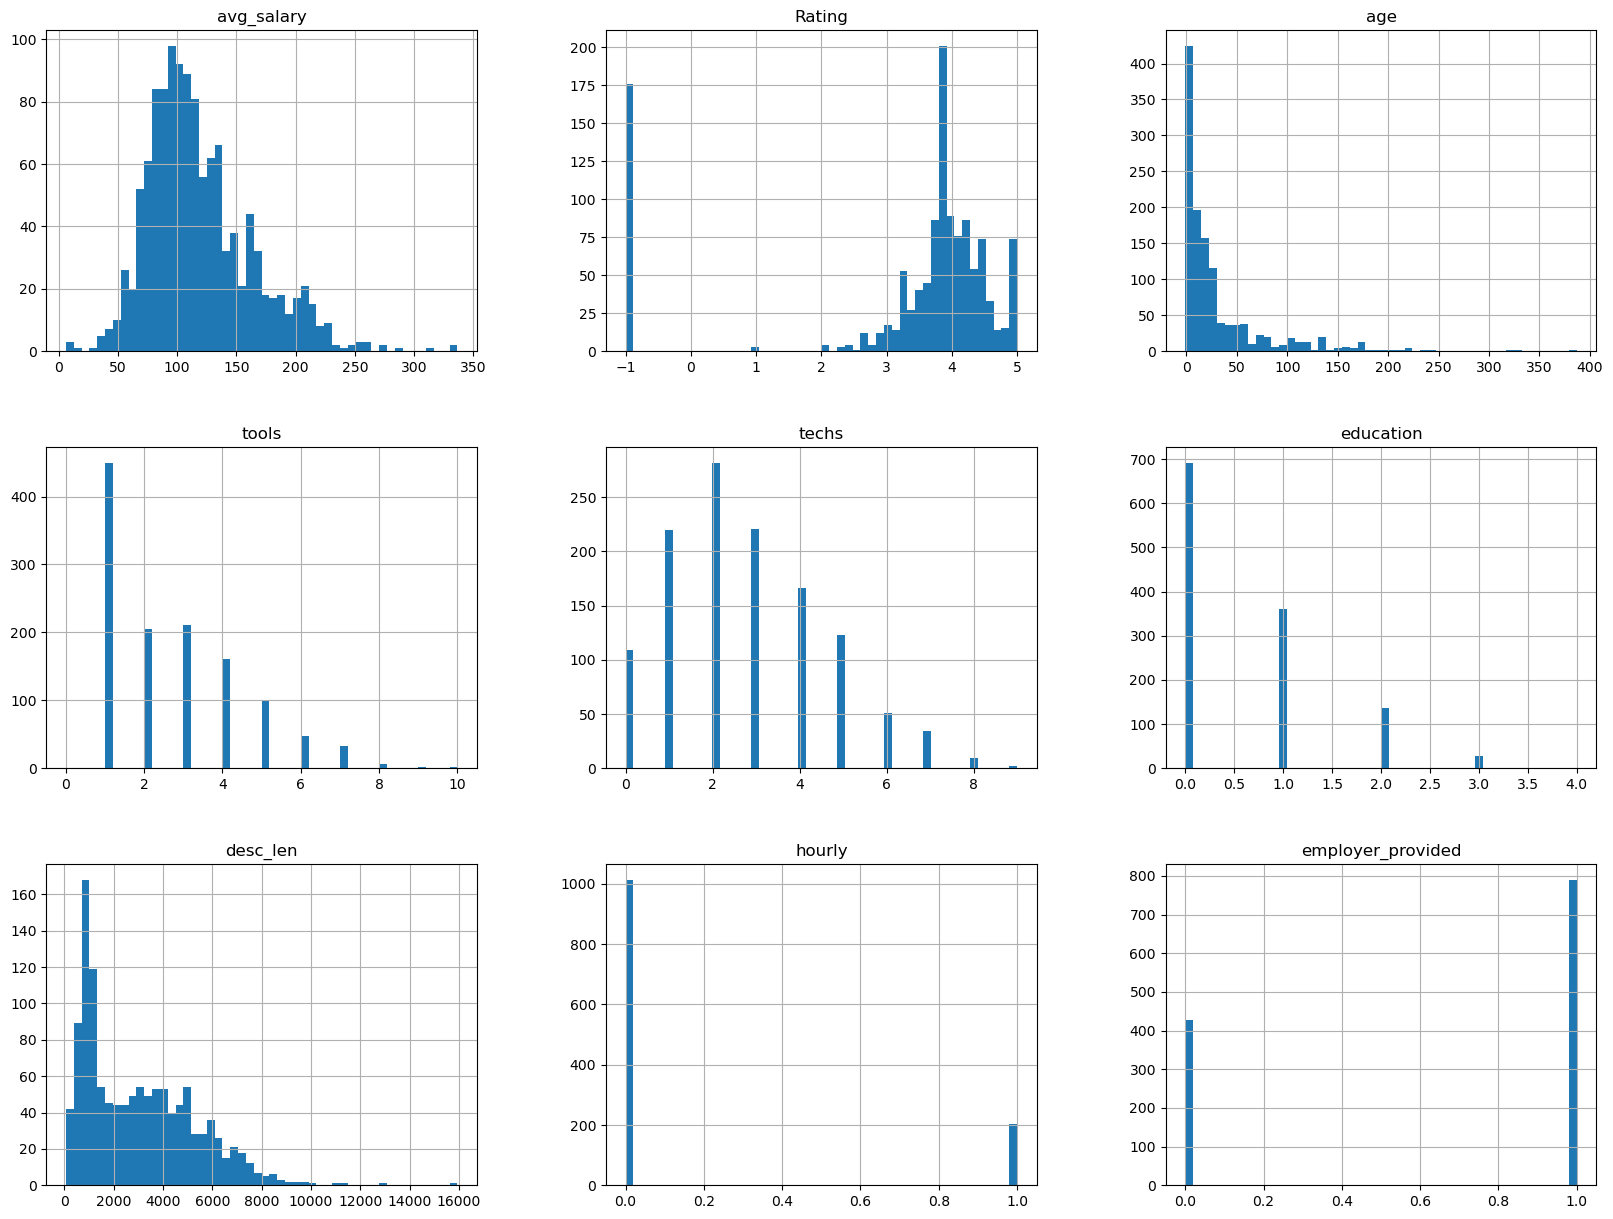

In [8]:
df_model.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
corr_matrix = df_model.corr(numeric_only=True)

In [10]:
corr_matrix['avg_salary'].sort_values(ascending=False).head(60)

avg_salary           1.000000
employer_provided    0.274816
techs                0.200833
desc_len             0.174798
tools                0.135537
Rating               0.065093
education            0.022855
age                 -0.076513
hourly              -0.170758
Name: avg_salary, dtype: float64

In [11]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_salary         1217 non-null   float64
 1   Rating             1217 non-null   float64
 2   Size               1217 non-null   object 
 3   Type of ownership  1217 non-null   object 
 4   Industry           1217 non-null   object 
 5   Sector             1217 non-null   object 
 6   Revenue            1217 non-null   object 
 7   job_title          1217 non-null   object 
 8   job_state          1217 non-null   object 
 9   age                1217 non-null   int64  
 10  tools              1217 non-null   int64  
 11  techs              1217 non-null   int64  
 12  education          1217 non-null   int64  
 13  seniority          1217 non-null   object 
 14  desc_len           1217 non-null   int64  
 15  company_name       1217 non-null   object 
 16  hourly             1217 

## 2.Create a Test Set

### we need to create a test set before we start to avoid data leakage or data snooping
### since our dataset is very small about 1200 and to ensure the test set is representative of the whole dataset
### to avoid sampling bias, we will use stratified sampling

### we need to ensure that the test set is representative of the various categories of avg_salaries in the whole dataset
### we will create a column of avg salaries categories ['<75k','<100k','<135k','<170k','<350k']

In [12]:
df_model =df_model.copy()
df_model['avg_salaries_cat'] = pd.cut(df_model['avg_salary'], bins=[0.,75,100,135,170,np.inf],
                                      labels=[0,1,2,3,4])

<Axes: >

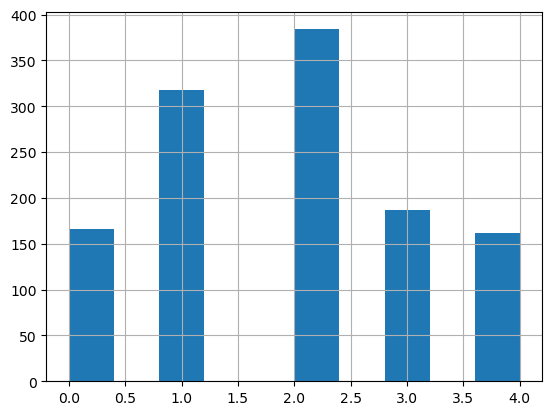

In [13]:
df_model['avg_salaries_cat'].hist()
#['<75k','<100k','<135k','<170k','<350k']

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1, test_size =0.2, random_state=42)
for train_index, test_index in split.split(df_model,df_model['avg_salaries_cat']):
    strat_train_set = df_model.loc[train_index]
    strat_test_set = df_model.loc[test_index]

In [15]:
strat_test_set['avg_salaries_cat'].value_counts() / len(strat_test_set)

2    0.315574
1    0.262295
3    0.155738
0    0.135246
4    0.131148
Name: avg_salaries_cat, dtype: float64

In [16]:
strat_train_set['avg_salaries_cat'].value_counts() / len(strat_train_set)

2    0.315519
1    0.261048
3    0.153135
0    0.136691
4    0.133607
Name: avg_salaries_cat, dtype: float64

### you will notice that every categories is represented equally in both the train set and test set

In [17]:
# drop the avg_salaries_cat so the data is back to its original state
for strat_set in (strat_train_set,strat_test_set,df_model):
    strat_set.drop("avg_salaries_cat",axis = 1, inplace=True)

### Get Numerical and Categorical Columns Names

In [18]:
# split the training set into a numerical and categorical columns
num_cols = strat_train_set[['Rating','age','tools','techs','education','desc_len','hourly','employer_provided']].reset_index(drop = True)
cat_cols = strat_train_set.drop(columns=['avg_salary','Rating','age','tools','techs','education','desc_len',
                                         'hourly','employer_provided'], axis =1).reset_index(drop=True)


## 3.Feature Scaling

In [ ]:
# using minmax scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
min_max = MinMaxScaler()
num_cols_min_max = min_max.fit_transform(num_cols_test)

In [ ]:
num_cols_min_max_df= pd.DataFrame(num_cols_min_max,columns=num_cols_imputed.columns,index=num_cols_imputed.index)

In [ ]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
num_cols_std = std_scaler.fit_transform(num_cols_test)

In [ ]:
num_cols_std_df= pd.DataFrame(num_cols_std,columns=num_cols_imputed.columns,index=num_cols_imputed.index)

## 4. Transformation Pipelines

In [19]:
# I had to do onehotencoding before splitting the data, because we have too many categories, it will raise error
# when transforming the test set
df_model_null = df_model.copy()
df_model_null.replace(to_replace={-1: np.NAN,'-1':np.NAN},inplace=True) 
df_dummy_null = pd.get_dummies(df_model_null,dummy_na=True)

In [20]:
df_dummy_null['avg_salaries_cat'] = pd.cut(df_dummy_null['avg_salary'], bins=[0.,75,100,135,170,np.inf],
                                      labels=[0,1,2,3,4])
split = StratifiedShuffleSplit(n_splits =1, test_size =0.2, random_state=42)
for train_index, test_index in split.split(df_dummy_null,df_dummy_null['avg_salaries_cat']):
    strat_train_set_dum_null = df_dummy_null.loc[train_index]
    strat_test_set_dum_null = df_dummy_null.loc[test_index]

In [21]:
# drop the avg_salaries_cat so the data is back to its original state
for strat_set in (strat_train_set_dum_null,strat_test_set_dum_null,df_dummy_null):
    strat_set.drop("avg_salaries_cat",axis = 1, inplace=True)

In [22]:
x_train_dum_null = strat_train_set_dum_null.drop("avg_salary",axis=1)
y_train_dum_null = strat_train_set_dum_null['avg_salary'].copy()

num_attribs_dum_null = list(num_cols.columns)
cat_attribs_dum_null = list(x_train_dum_null.iloc[:,8:])

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer

# for lasso, Forest and xgboost
reg_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


# for svm_reg
svm_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('min_max_scaler', MinMaxScaler()),
])


# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors = 3)

# full_pipeline = ColumnTransformer([
#     ("num", reg_pipeline , num_attribs),
#     ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_attribs),
# ])

x_train_prepared = reg_pipeline.fit_transform(x_train_dum_null)
x_train_svm_prepared = svm_pipeline.fit_transform(x_train_dum_null)

## 6. Select and Train a model

In [24]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_prepared, y_train_dum_null)
tree_predictions = tree_reg.predict(x_train_prepared)
tree_mae = mean_absolute_error(y_train_dum_null,tree_predictions)
tree_mae

0.020554984583761562

In [25]:
from sklearn.linear_model import  Lasso

lasso_reg = Lasso(alpha= 0.1,max_iter =2000)
lasso_reg.fit(x_train_prepared, y_train_dum_null)
lasso_predictions = lasso_reg.predict(x_train_prepared)
lasso_mae = mean_absolute_error(y_train_dum_null,lasso_predictions)
lasso_mae

5.436525711622593

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators= 800,min_samples_split= 2,min_samples_leaf= 1,max_features= 50,
                     max_depth= 30,bootstrap= False)
forest_reg.fit(x_train_prepared, y_train_dum_null)
forest_predictions = forest_reg.predict(x_train_prepared)
forest_mae = mean_absolute_error(y_train_dum_null,forest_predictions)
forest_mae

1.8105531175684328

In [27]:
from sklearn.svm import SVR

svm_reg = SVR(kernel= 'rbf', C= 120, gamma=0.1)
svm_reg.fit(x_train_svm_prepared, y_train_dum_null)
svm_predictions = svm_reg.predict(x_train_svm_prepared)
svm_mae = mean_absolute_error(y_train_dum_null,svm_predictions)
svm_mae

3.276556560660099

In [38]:
scores = cross_val_score(tree_reg, x_train_prepared, y_train_dum_null, scoring='neg_mean_absolute_error', cv = 6)
print('Decision_Tree scores: ',scores, 'mean', np.mean(scores))

Decision_Tree scores:  [-22.9601227  -26.90740741 -24.17592593 -25.6882716  -26.86111111
 -24.75      ] mean -25.223806458128205


In [39]:
scores = cross_val_score(lasso_reg, x_train_prepared, y_train_dum_null, scoring='neg_mean_absolute_error', cv = 6)
print('Lasso_regression scores: ',scores, 'mean', np.mean(scores))

Lasso_regression scores:  [-21.96016882 -18.07723081 -20.49183826 -17.47883715 -20.99048647
 -19.63878769] mean -19.77289153421683


In [40]:
scores = cross_val_score(svm_reg, x_train_svm_prepared, y_train_dum_null, scoring='neg_mean_absolute_error', cv = 6)
print('SVM_reg scores: ',scores, 'mean', np.mean(scores))

SVM_reg scores:  [-19.45949034 -17.92392442 -19.11480251 -16.4948488  -20.44002751
 -17.95271752] mean -18.564301850477257


In [41]:
scores = cross_val_score(forest_reg, x_train_prepared, y_train_dum_null, scoring='neg_mean_absolute_error', cv = 6)
print('Random_Forest scores: ',scores, 'mean', np.mean(scores))

Random_Forest scores:  [-20.49666038 -18.96813669 -20.45374961 -18.12591912 -21.40193284
 -19.22137501] mean -19.77796227639838


## 6. Fine-Tuning

In [185]:
# Random Forest finetuning

forest_param_grid = [
    {'n_estimators':[100,110,120,130], 'max_features': [15,17,18,19]}, #2,4,6,8,10,13,14, 3,10,30,50,70,80,90,
    #{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_grid_search = GridSearchCV(forest_reg, forest_param_grid, cv= 6, scoring='neg_mean_absolute_error', return_train_score=True,verbose=2)

forest_grid_search.fit(x_train_svm_prepared, y_train_dum_null)

Fitting 6 folds for each of 16 candidates, totalling 96 fits
[CV] END ..................max_features=15, n_estimators=100; total time=   0.9s
[CV] END ..................max_features=15, n_estimators=100; total time=   0.9s
[CV] END ..................max_features=15, n_estimators=100; total time=   1.0s
[CV] END ..................max_features=15, n_estimators=100; total time=   0.9s
[CV] END ..................max_features=15, n_estimators=100; total time=   0.9s
[CV] END ..................max_features=15, n_estimators=100; total time=   0.9s
[CV] END ..................max_features=15, n_estimators=110; total time=   1.0s
[CV] END ..................max_features=15, n_estimators=110; total time=   1.0s
[CV] END ..................max_features=15, n_estimators=110; total time=   1.0s
[CV] END ..................max_features=15, n_estimators=110; total time=   1.0s
[CV] END ..................max_features=15, n_estimators=110; total time=   1.0s
[CV] END ..................max_features=15, n_es

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [15, 17, 18, 19],
                          'n_estimators': [100, 110, 120, 130]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [186]:
forest_grid_search.best_params_   #15 ,100 , 17, 110

{'max_features': 19, 'n_estimators': 130}

In [196]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 4, stop = 50, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [4, 9, 14, 19, 24, 29, 34, 39, 44, 50],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [199]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
forest_random_search = RandomizedSearchCV(estimator = forest_reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model
forest_random_search.fit(x_train_prepared,y_train_dum_null)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [4, 9, 14, 19, 24, 29,
                                                         34, 39, 44, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=3)

In [200]:
forest_random_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 50,
 'max_depth': 30,
 'bootstrap': False}

Fitting 6 folds for each of 6 candidates, totalling 36 fits
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ........................................

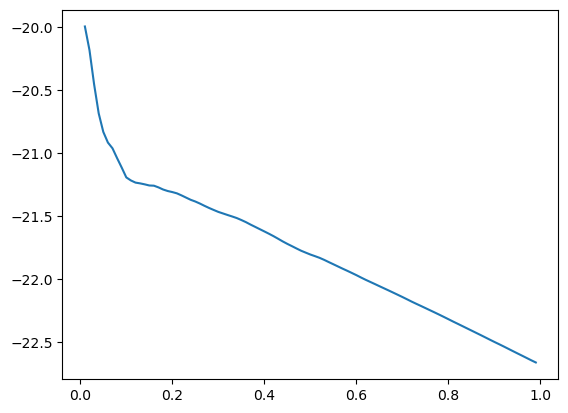

In [167]:
# lasso regression finetuning

lasso_param_grid = {'alpha':[0.01,0.02, 0.024, 0.025, 0.026, 0.03]}

lasso_grid_search = GridSearchCV(lasso_reg, lasso_param_grid, cv= 6, scoring='neg_mean_absolute_error', return_train_score=True, verbose=2)

lasso_grid_search.fit(x_train_svm_prepared, y_train_dum_null)


alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    llg = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(llg,x_train_svm_prepared,y_train_dum_null, scoring = 'neg_mean_absolute_error', cv= 6)))
    
plt.plot(alpha,error)

In [168]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.01,-19.99456


In [169]:
lasso_grid_search.best_params_

{'alpha': 0.01}

In [ ]:
from sklearn.model_selection import GridSearchCV

# svm_reg finetuning

svm_param_grid = [# 1, 5, 10, 15, 20, 30, 40, 60, 80,  , 1000   , 0.001
    {'C': [ 115,120,125,135,145], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
    {'C': [  115,125,135,145], 'gamma': [1, 0.1, 0.01], 'kernel': ['poly'], 'degree': [1,2]},
    #{'C': [ 1, 5, 10, 15, 20, 30, 40, 60, 80, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']}
]

svm_grid_search = GridSearchCV(svm_reg, svm_param_grid, cv= 6, scoring='neg_mean_absolute_error', return_train_score=True, verbose=2)

svm_grid_search.fit(x_train_svm_prepared, y_train_dum_null)

Fitting 6 folds for each of 39 candidates, totalling 234 fits
[CV] END .........................C=115, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=115, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=115, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=115, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=115, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=115, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .......................C=115, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=115, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=115, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=115, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=115, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=115, gamma=0.

In [37]:
svm_grid_search.best_params_   #{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

{'C': 120, 'gamma': 0.1, 'kernel': 'rbf'}

In [38]:
svm_grid_search.best_estimator_

SVR(C=120, gamma=0.1)

In [60]:
from sklearn.model_selection import GridSearchCV
import optuna

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
    model = xgb.XGBRegressor(**param)
    model.fit(x_train_prepared, y_train_dum_null)
    y_pred = model.predict(x_test_prepared)
    return mean_absolute_error(y_test_dum, y_pred)


study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)


print('Best parameters', study.best_params)
print('Best value', study.best_value)
print('Best trial', study.best_trial)

[I 2023-08-31 09:04:27,777] A new study created in memory with name: regression
[I 2023-08-31 09:04:30,850] Trial 0 finished with value: 36.35048422266225 and parameters: {'max_depth': 2, 'learning_rate': 0.8142021659420903, 'n_estimators': 749, 'min_child_weight': 10, 'gamma': 0.4839153350053353, 'subsample': 0.44120162631611903, 'colsample_bytree': 0.8103371111036933, 'reg_alpha': 0.25052541688564994, 'reg_lambda': 0.8920540104271798, 'random_state': 398}. Best is trial 0 with value: 36.35048422266225.
[I 2023-08-31 09:04:33,446] Trial 1 finished with value: 20.897860026750408 and parameters: {'max_depth': 9, 'learning_rate': 0.045312176293431324, 'n_estimators': 190, 'min_child_weight': 10, 'gamma': 0.3869550570628285, 'subsample': 0.8880201856843155, 'colsample_bytree': 0.9442296666598982, 'reg_alpha': 0.6880863716063975, 'reg_lambda': 0.16737076396721884, 'random_state': 629}. Best is trial 1 with value: 20.897860026750408.
[I 2023-08-31 09:04:34,816] Trial 2 finished with value: 

Best parameters {'max_depth': 9, 'learning_rate': 0.03764234987808425, 'n_estimators': 715, 'min_child_weight': 1, 'gamma': 0.16649306864440108, 'subsample': 0.97499514250235, 'colsample_bytree': 0.9365927802490076, 'reg_alpha': 0.2291206375618084, 'reg_lambda': 0.06647350170916537, 'random_state': 342}
Best value 19.246840242479667
Best trial FrozenTrial(number=83, state=1, values=[19.246840242479667], datetime_start=datetime.datetime(2023, 8, 31, 9, 13, 30, 268619), datetime_complete=datetime.datetime(2023, 8, 31, 9, 13, 41, 321494), params={'max_depth': 9, 'learning_rate': 0.03764234987808425, 'n_estimators': 715, 'min_child_weight': 1, 'gamma': 0.16649306864440108, 'subsample': 0.97499514250235, 'colsample_bytree': 0.9365927802490076, 'reg_alpha': 0.2291206375618084, 'reg_lambda': 0.06647350170916537, 'random_state': 342}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1), 'learning_rate': FloatDis

## 7. Ensemble methods

### a. Trying Gradient Boosting using xgboost

In [28]:
import xgboost as xgb
xgb_params = {'tree_method': 'gpu_hist','objective': 'reg:squarederror',
              'max_depth': 9, 'learning_rate': 0.03764234987808425, 'n_estimators': 715, 'min_child_weight': 1,
              'gamma': 0.16649306864440108,'subsample': 0.97499514250235, 'colsample_bytree': 0.9365927802490076,
              'reg_alpha': 0.2291206375618084, 'reg_lambda': 0.06647350170916537, 'random_state': 342}
xgb_reg = xgb.XGBRegressor(**xgb_params)
xgb_reg.fit(x_train_prepared,y_train_dum_null)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9365927802490076, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.16649306864440108, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03764234987808425, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=715, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=342, ...)

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_reg, x_train_prepared, y_train_dum_null, scoring='neg_mean_absolute_error', cv = 6)
print('xgboost scores: ',scores, 'mean', np.mean(scores))

xgboost scores:  [-20.28038549 -19.55722159 -19.26213493 -18.67232363 -22.45961952
 -19.08958108] mean -19.88687770602445


### b. Trying Voting Classifier

In [41]:
from sklearn.ensemble import VotingRegressor

svr_pipeline = Pipeline([("transform", svm_pipeline), ("model", svm_reg)])
rf_pipeline = Pipeline([("transform", reg_pipeline), ("model", forest_reg)])
lasso_pipeline = Pipeline([("transform", reg_pipeline), ("model", lasso_reg)])
xgb_pipeline = Pipeline([("transform", reg_pipeline), ("model", xgb_reg)])

def median_voting(estimators, X):
    # Get the predicted probabilities or scores from each estimator
    predictions = np.asarray([est.predict_proba(X) for est in estimators])
    # Return the median along axis 1
    return np.median(predictions, axis=0)

voting_reg = VotingRegressor(
    estimators=[
        # ('lasso', lasso_pipeline),
        ('SVR', svr_pipeline),
        # ('RF', rf_pipeline),
        ('xgb', xgb_pipeline)
    ])

# voting_reg.voting = "soft"
voting_reg.voting = median_voting
voting_reg.named_estimators["SVR"].probability = True
voting_reg.fit(x_train_dum_null,y_train_dum_null)

VotingRegressor(estimators=[('SVR',
                             Pipeline(steps=[('transform',
                                              Pipeline(steps=[('imputer',
                                                               SimpleImputer(strategy='median')),
                                                              ('min_max_scaler',
                                                               MinMaxScaler())])),
                                             ('model',
                                              SVR(C=120, gamma=0.1))])),
                            ('xgb',
                             Pipeline(steps=[('transform',
                                              Pipeline(steps=[('imputer',
                                                               SimpleImputer(strategy='median')),
                                                              ('std_scaler',
                                                               StandardScaler())])),
                                             ('model',
                                              XGBRegressor(...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=0.03764234987808425,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=9,
                                                           max_leaves=None,
                                                           min_child_weight=1,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=715,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=342, ...))]))])

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_reg, x_train_dum_null, y_train_dum_null, scoring='neg_mean_absolute_error', cv = 6)
print('voting_reg scores: ',scores, 'mean', np.mean(scores))

voting_reg scores:  [-19.55200822 -17.62318805 -18.70024823 -16.1127627  -20.23876947
 -18.23102448] mean -18.409666857697694


In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_reg, x_train_dum_null, y_train_dum_null, scoring='neg_mean_absolute_error', cv = 6)
print('voting_reg scores: ',scores, 'mean', np.mean(scores))

voting_reg scores:  [-19.05319858 -18.18076667 -18.62879389 -16.94490517 -21.00690735
 -18.14808168] mean -18.660442223186788


## 9. Evaluate the System on the test set

In [32]:
x_test_dum = strat_test_set_dum_null.drop("avg_salary",axis=1)
y_test_dum = strat_test_set_dum_null['avg_salary'].copy()

In [33]:
x_test_prepared = reg_pipeline.transform(x_test_dum)
x_test_svm_prepared = svm_pipeline.transform(x_test_dum)

In [45]:
pred_lasso_reg = lasso_reg.predict(x_test_prepared)
pred_tree_reg = tree_reg.predict(x_test_prepared)
pred_forest_reg = forest_reg.predict(x_test_prepared)
pred_svm_reg = svm_reg.predict(x_test_svm_prepared)
pred_xgboost_reg= xgb_reg.predict(x_test_prepared)
pred_voting_reg = voting_reg.predict(x_test_dum)

In [46]:
from sklearn.metrics import mean_absolute_error
print('tree : ', mean_absolute_error(y_test_dum,pred_tree_reg))
print('lasso: ', mean_absolute_error(y_test_dum,pred_lasso_reg))
print('forest: ', mean_absolute_error(y_test_dum,pred_forest_reg))
print('svm : ', mean_absolute_error(y_test_dum,pred_svm_reg))
print('xgboost :', mean_absolute_error(y_test_dum, pred_xgboost_reg))
print('voting :', mean_absolute_error(y_test_dum,pred_voting_reg))

tree :  21.903688524590162
lasso:  20.05954023950747
forest:  19.98323497355038
svm :  18.0470239399755
xgboost : 19.282901466869916
voting : 18.295586045440814


### The voting classifier with svm and xgboost is better than all 4 models but still svm is the best model

## Looks Like SVM is the best model followed by the voting classifier, xgboost, RandomForest and Lasso Regression

## 10. import the model

In [77]:
import pickle
pickl = {'svm_model': svm_reg}
with open(os.path.join(LOG_PATH, LOG_MODEL_PKL), "wb") as output_file:
    pickle.dump(pickl, output_file)


In [85]:
with open(os.path.join(LOG_PATH, LOG_MODEL_PKL), 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['svm_model']

In [92]:
len(x_test_svm_prepared[0])

1068

In [96]:
model.predict(x_test_svm_prepared[0:3])

array([128.60479243,  92.72400118,  69.06440987])